In [1]:
import numpy as np
import pandas as pd
import data_lib
import plot_lib
import transform_lib
import decision_lib
from sklearn import cluster

np.random.seed(200)

In [2]:
# print available data summary
_ = data_lib.explore_datasets(datafolder="../../Data",verbose=True)
print(data_lib.LABELS_LIST)

----------------------------------------------------------------------------------------------
-- The following 4 groups were found
-- They contain 40 datasets
-- The first printed entity is the key to the returned dictionary
-----------------------------------
Group: ../../Data/6P-positive-dilution-series-2-labelled/droplet-level-data/RawData
po-di-se-2-A4, files: 13                po-di-se-2-C4, files: 13                po-di-se-2-A1, files: 13
po-di-se-2-B1, files: 13                po-di-se-2-D1, files: 13                po-di-se-2-B4, files: 13
po-di-se-2-C1, files: 13                po-di-se-2-D4, files: 13                
-----------------------------------
Group: ../../Data/6P-positive-dilution-series-1-labelled/droplet-level-data/RawData
po-di-se-1-D4, files: 13                po-di-se-1-A4, files: 13                po-di-se-1-A1, files: 13
po-di-se-1-D1, files: 13                po-di-se-1-B1, files: 13                po-di-se-1-C1, files: 13
po-di-se-1-B4, files: 13         

### Get samples for negative control

In [3]:

# compute transformation on waste water
df_wa = data_lib.load_dataset(None, [
                                     "wa-sa-A2", "wa-sa-B4",
                                     "wa-sa-C4",
                                     "wa-sa-B3",  "wa-sa-B2",
                                     "wa-sa-A5", "wa-sa-A3",
                                     "wa-sa-C2",
                                     "wa-sa-C3", # Pos
                                     "wa-sa-D3", # Zero
                                     "wa-sa-D4", 
                                     "wa-sa-B1", "wa-sa-A4",
                                     "wa-sa-A1", "wa-sa-D2",
                                     "wa-sa-C5", # Pos
                                     "wa-sa-D5", # Zero
                                     "wa-sa-C1",
                                     ], datafolder="../../Data")
df_negative_control = data_lib.load_dataset([],[
                                                "wa-sa-D3",
                                                "wa-sa-D5"
                                                ], datafolder="../../Data")
df_positive_control = data_lib.load_dataset([],[
                                                "wa-sa-C3",
                                                "wa-sa-C5"
                                                ], datafolder="../../Data")
np_negative_control = df_negative_control.to_numpy()
np_positive_control = df_positive_control.to_numpy()
np_wa = df_wa.to_numpy(copy=True)[:,:6]
ZCA_whitener = transform_lib.WhitenTransformer(transform_lib.Whitenings.ZCA_COR)
NONE_whitener = transform_lib.WhitenTransformer(transform_lib.Whitenings.NONE)


In [4]:
# fix clustering algorithm
cluster_engine = cluster.KMeans(n_clusters=64, n_init='auto')
zca_decitions = decision_lib.ThresholdMeanClassifier(
                                     negative_control=np_negative_control,
                                     positive_control=np_positive_control,
                                     cluster_algorithm=cluster_engine,
                                     transform_base="dynamic",
                                     whitening_transformer=ZCA_whitener,
                                     )
zca_decitions.fit(np_wa)
df_zca_preds = zca_decitions.predict(np_wa)

## Plot the predictions

- Black = True negative prediction
- Green = True positive prediciton
- Purple = False negative
- Red = False positive

#### Plot SARS-N2_POS associated with channel 1

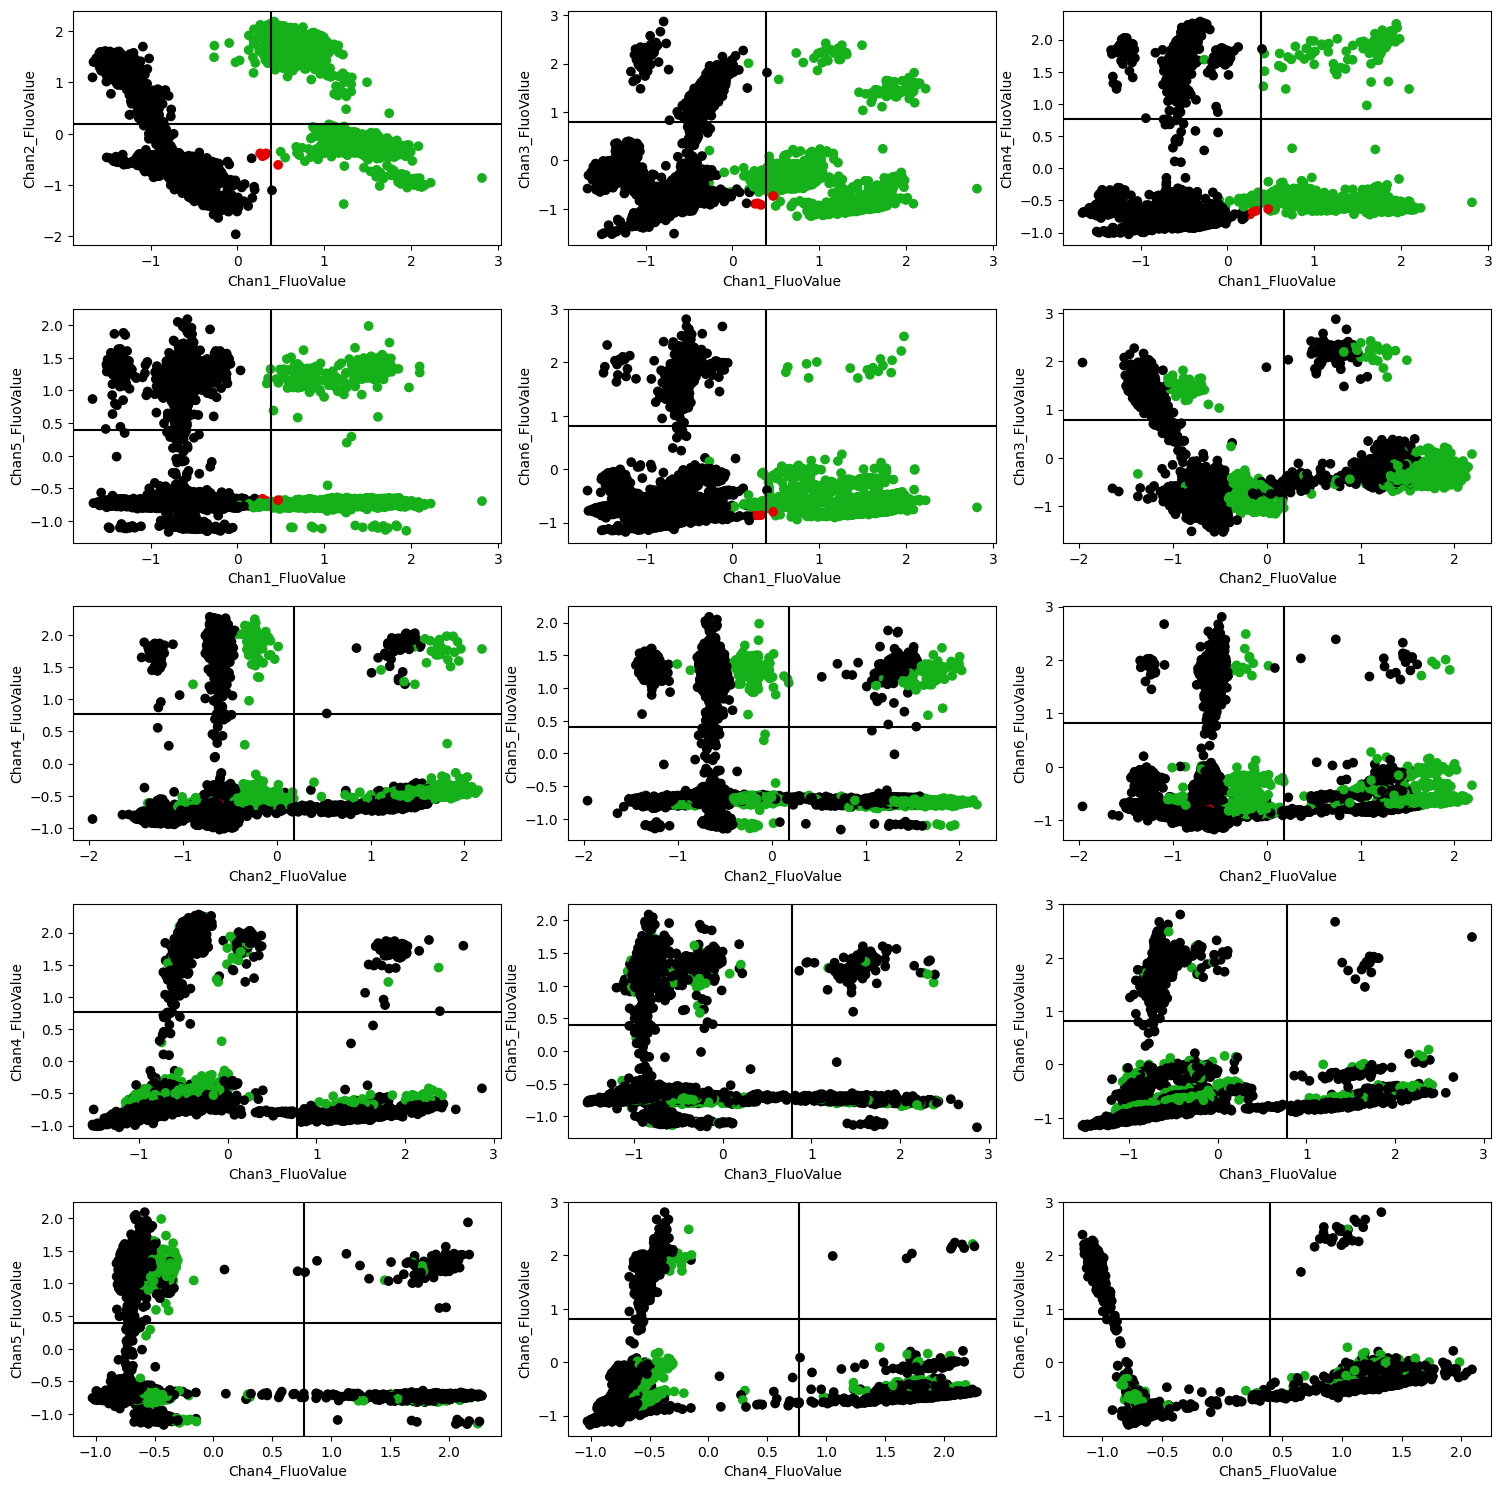

In [5]:
plot_lib.pairwise_plots_pred_true_thresh(pd.DataFrame(data=zca_decitions.X_all_transformed, columns=df_wa.iloc[:,:6].columns),
                                         df_zca_preds.loc[:,"SARS-N2_POS"],
                                         df_wa.loc[:,"SARS-N2_POS"],
                                         axis_thresh=zca_decitions.axis_threshholds)

#### Plot SARS-N1_POS associated with cannel 2

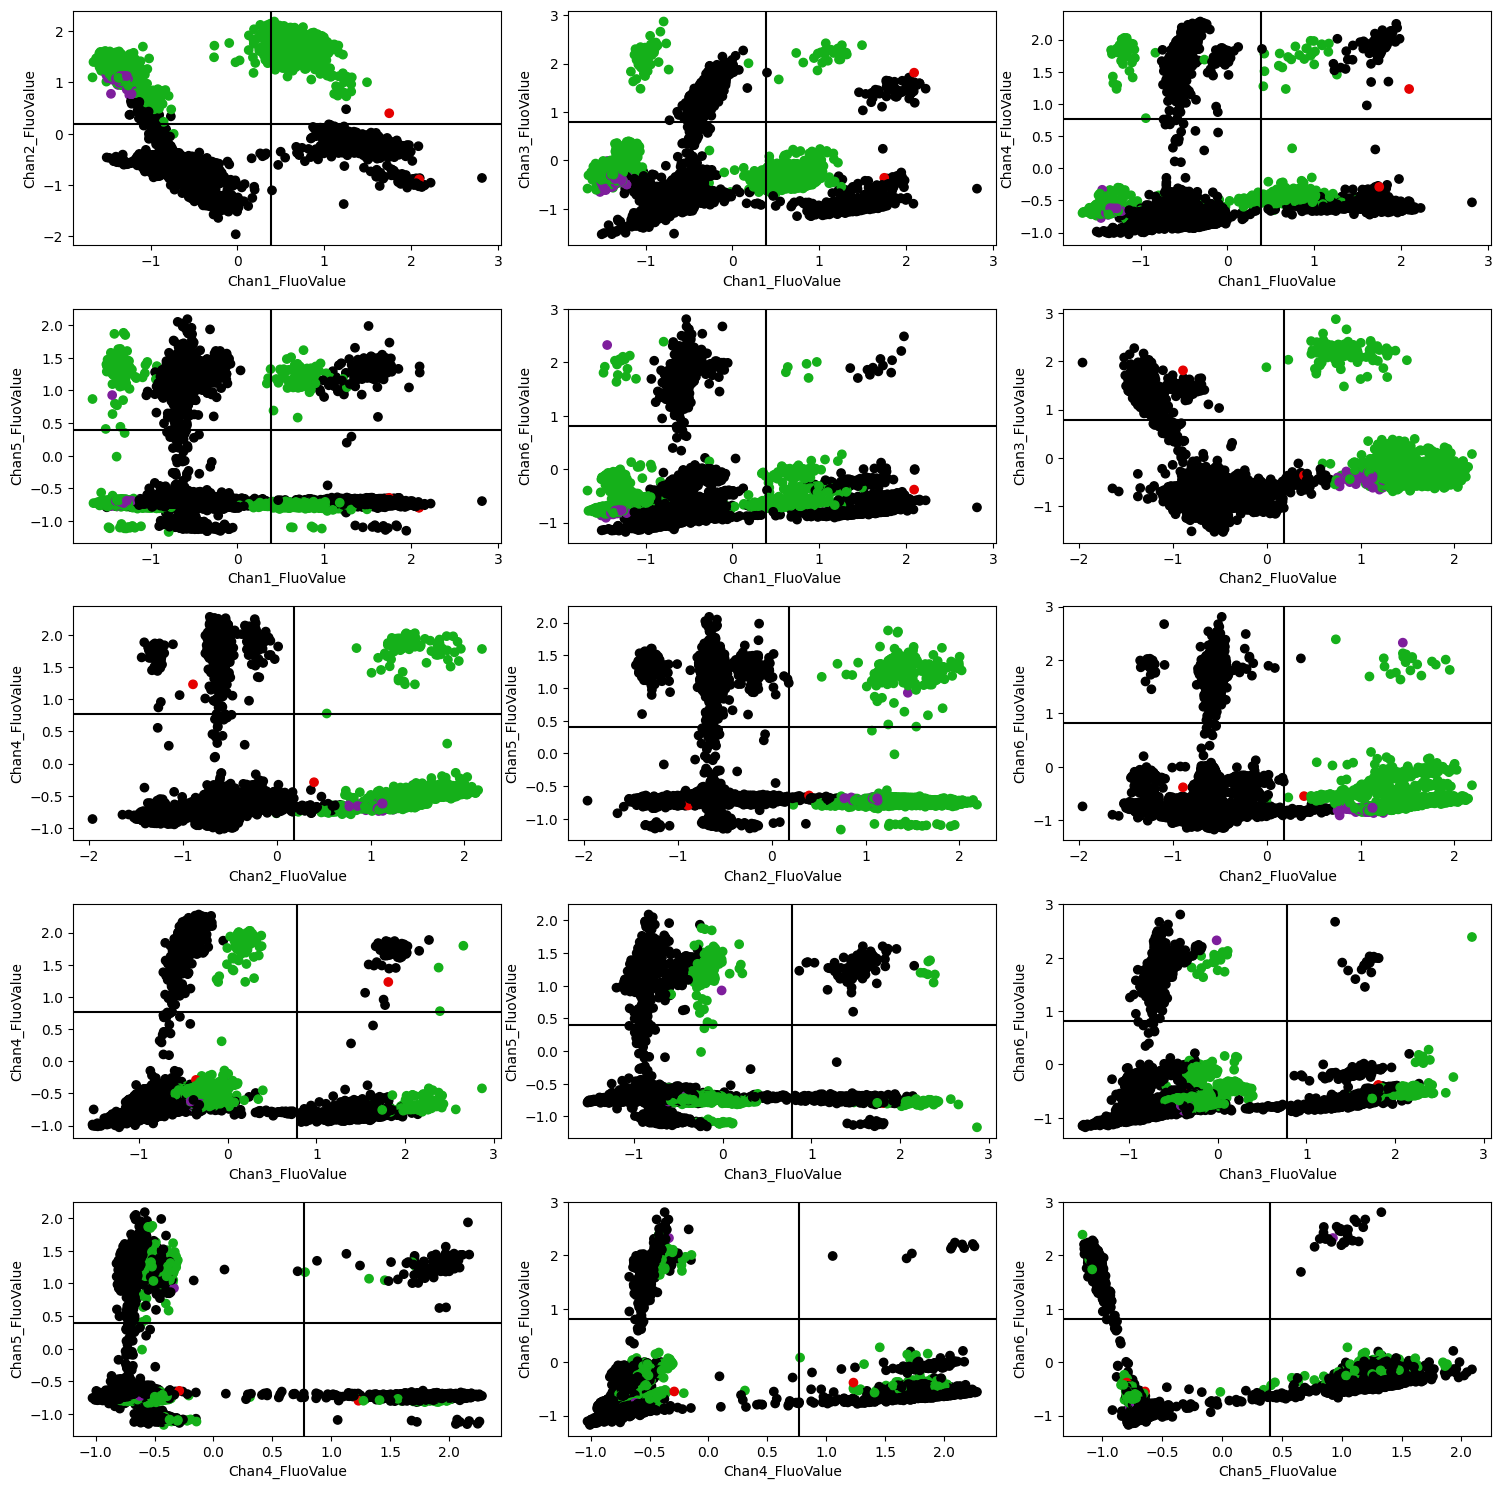

In [6]:
plot_lib.pairwise_plots_pred_true_thresh(pd.DataFrame(data=zca_decitions.X_all_transformed, columns=df_wa.iloc[:,:6].columns),
                                         df_zca_preds.loc[:,"SARS-N1_POS"],
                                         df_wa.loc[:,"SARS-N1_POS"],
                                         axis_thresh=zca_decitions.axis_threshholds)

#### Plot IBV-M_POS associated with channel 3

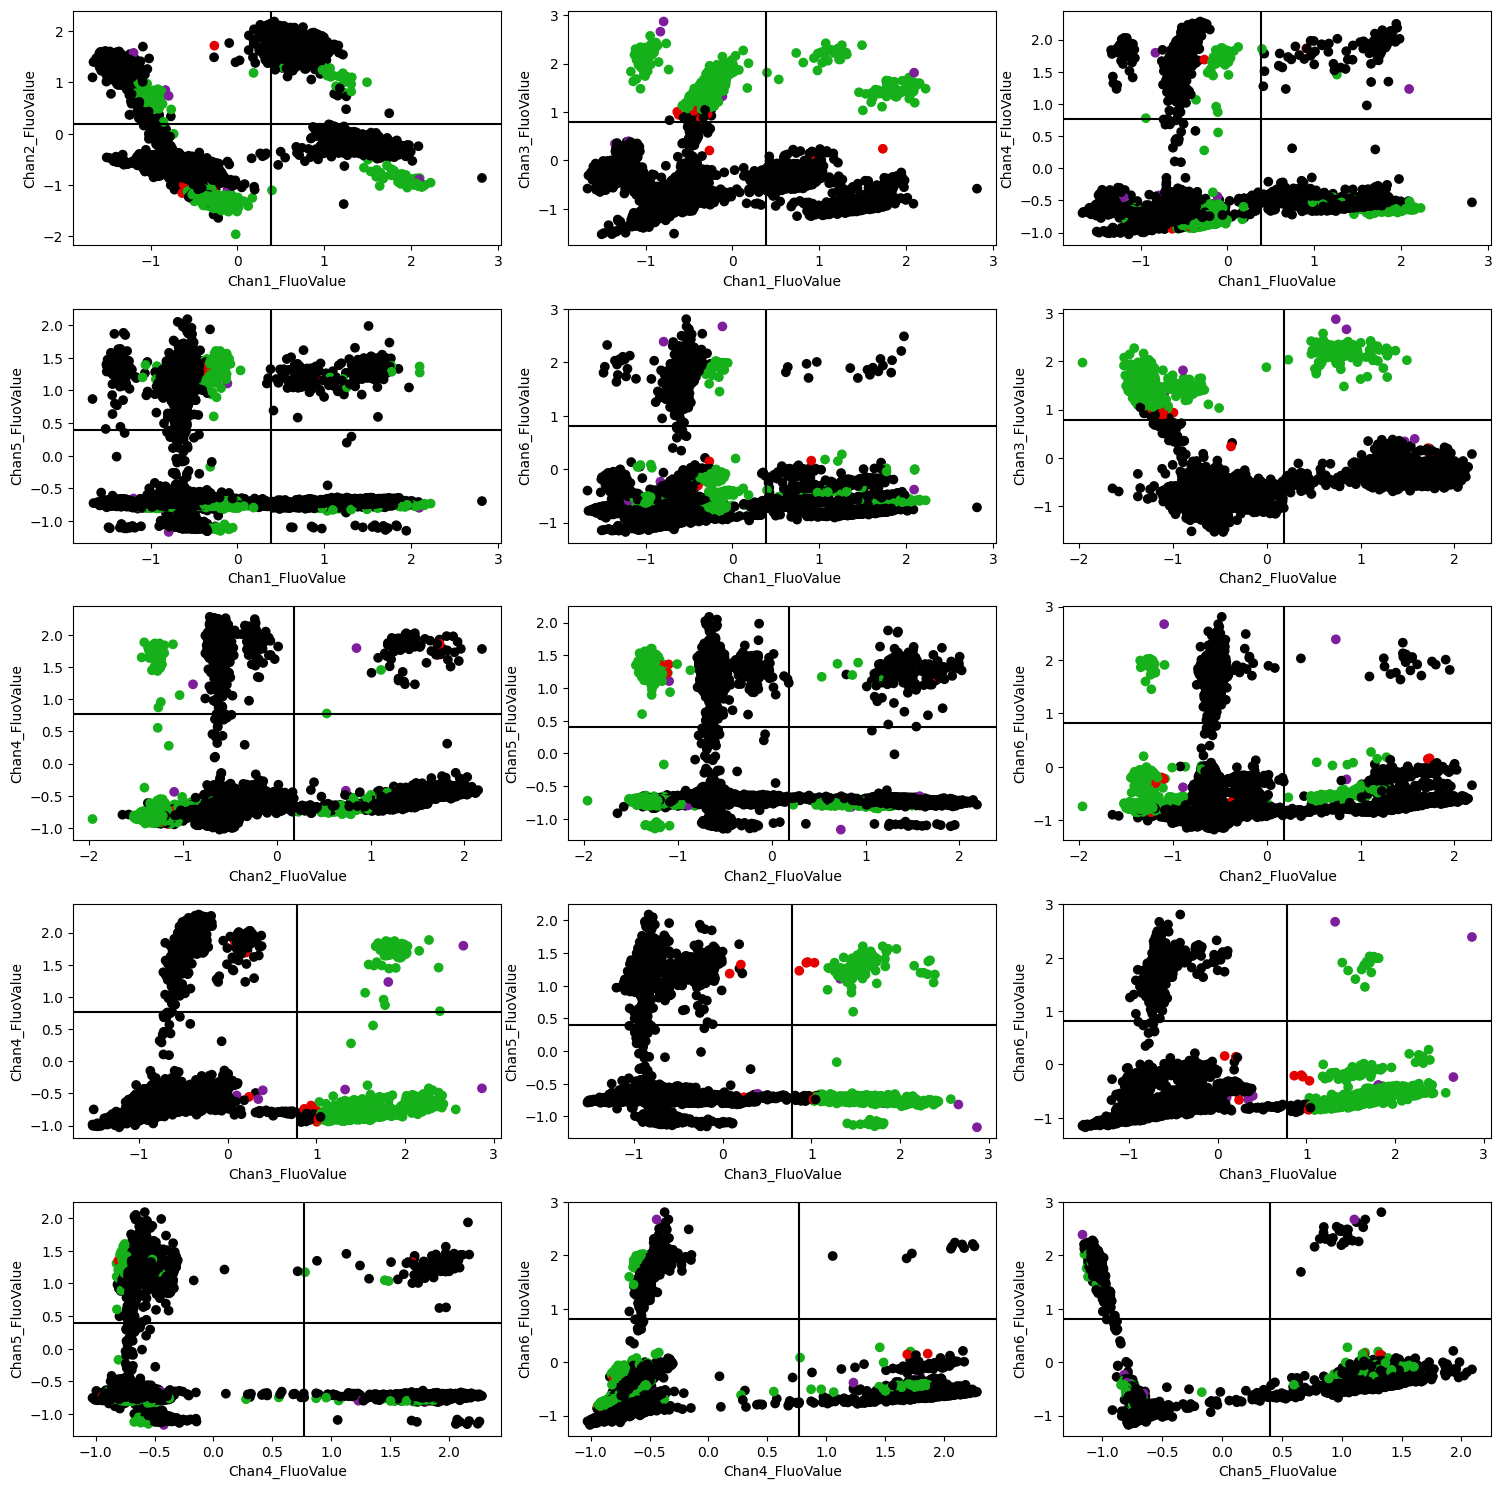

In [7]:
plot_lib.pairwise_plots_pred_true_thresh(pd.DataFrame(data=zca_decitions.X_all_transformed, columns=df_wa.iloc[:,:6].columns),
                                         df_zca_preds.loc[:,"IBV-M_POS"],
                                         df_wa.loc[:,"IBV-M_POS"],
                                         axis_thresh=zca_decitions.axis_threshholds)

#### Plot RSV-N_POS associated with cannel 4

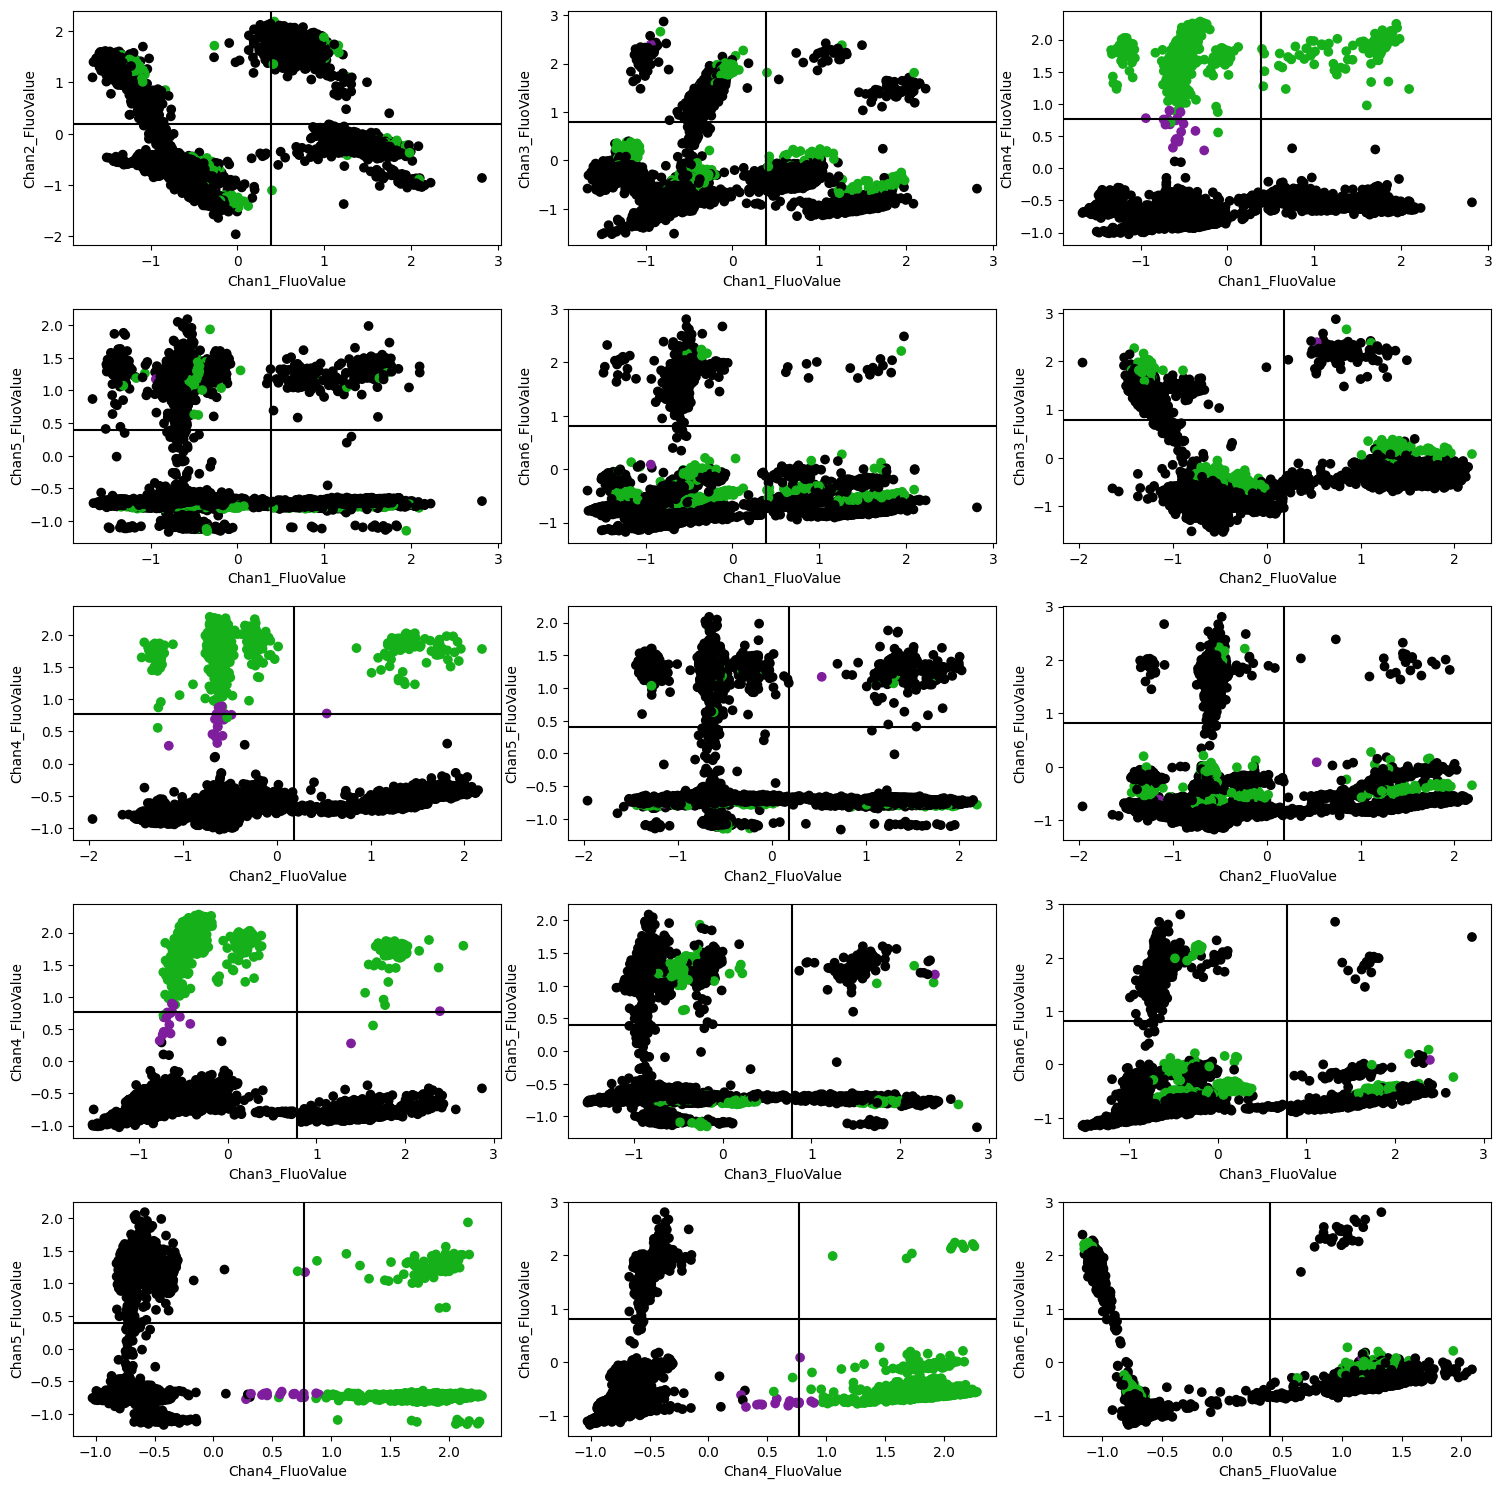

In [8]:
plot_lib.pairwise_plots_pred_true_thresh(pd.DataFrame(data=zca_decitions.X_all_transformed, columns=df_wa.iloc[:,:6].columns),
                                         df_zca_preds.loc[:,"RSV-N_POS"],
                                         df_wa.loc[:,"RSV-N_POS"],
                                         axis_thresh=zca_decitions.axis_threshholds)

#### Plot IAV-M_POS associated with cannel 5

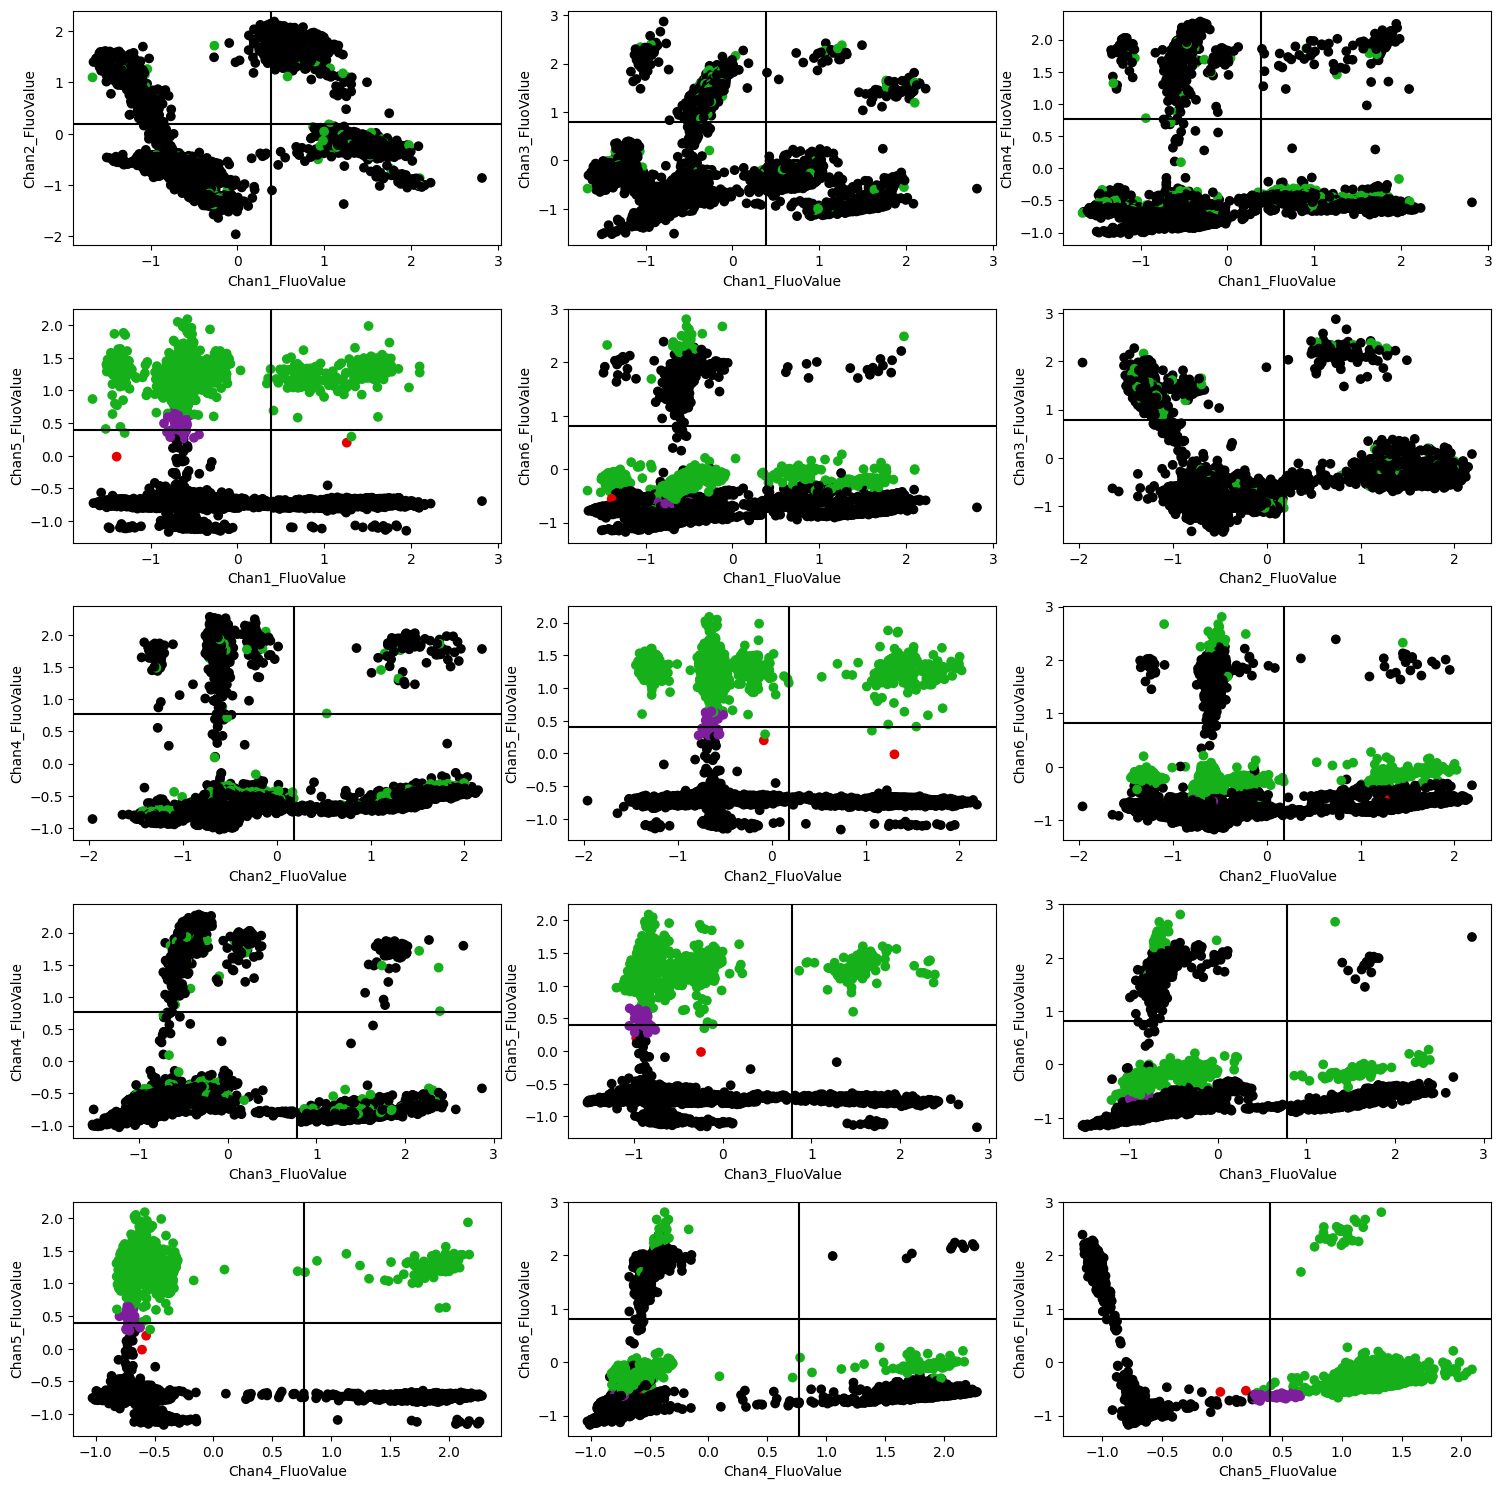

In [9]:
plot_lib.pairwise_plots_pred_true_thresh(pd.DataFrame(data=zca_decitions.X_all_transformed, columns=df_wa.iloc[:,:6].columns),
                                         df_zca_preds.loc[:,"IAV-M_POS"],
                                         df_wa.loc[:,"IAV-M_POS"],
                                         axis_thresh=zca_decitions.axis_threshholds)

#### Plot MHV_POS associated with cannel 6

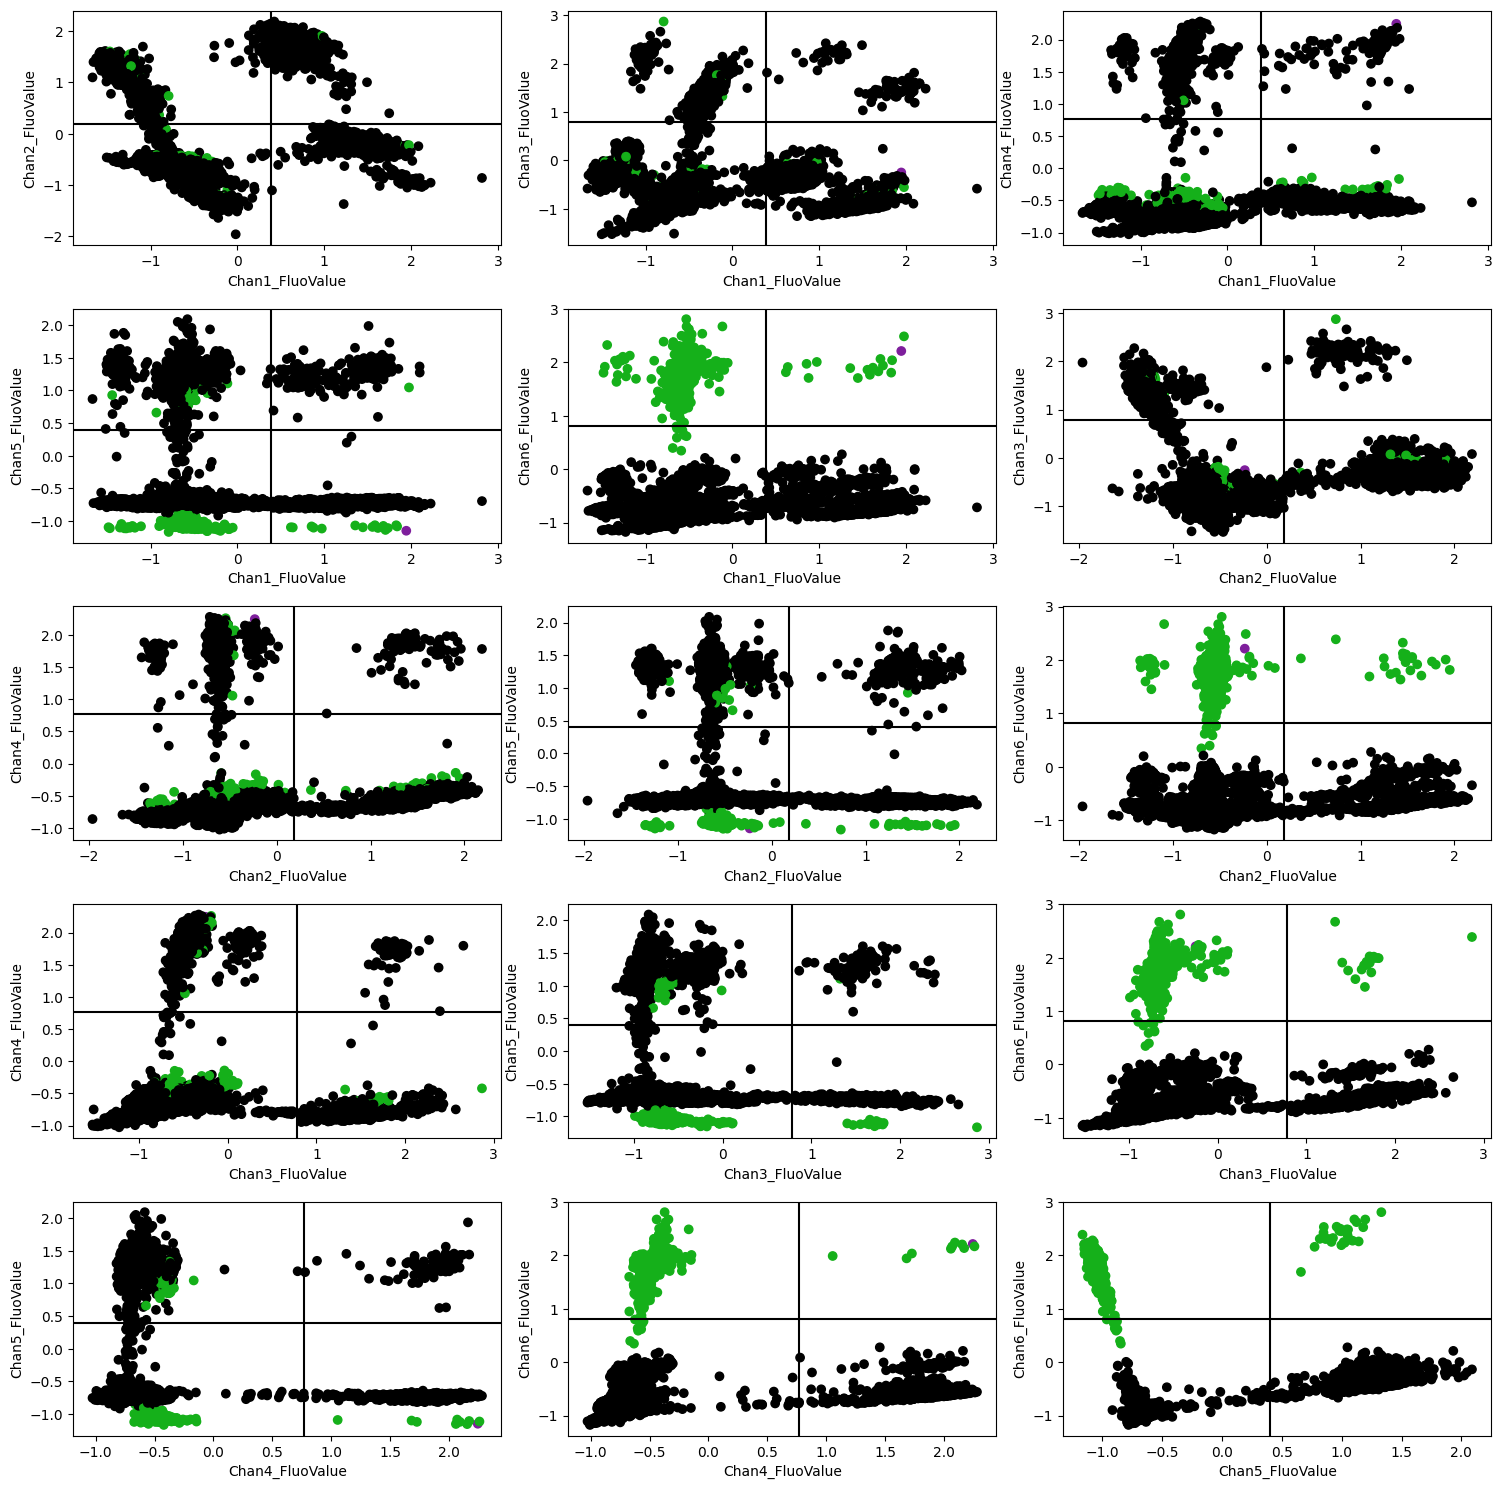

In [10]:
plot_lib.pairwise_plots_pred_true_thresh(pd.DataFrame(data=zca_decitions.X_all_transformed, columns=df_wa.iloc[:,:6].columns),
                                         df_zca_preds.loc[:,"MHV_POS"],
                                         df_wa.loc[:,"MHV_POS"],
                                         axis_thresh=zca_decitions.axis_threshholds)